In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
157,158,Female,30,78,78
6,7,Female,35,18,6
71,72,Female,47,49,42
182,183,Male,46,98,15
140,141,Female,57,75,5
4,5,Female,31,17,40
27,28,Male,35,28,61
179,180,Male,35,93,90
115,116,Female,19,65,50
23,24,Male,31,25,73


In [15]:
df.duplicated().sum()

0

In [20]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

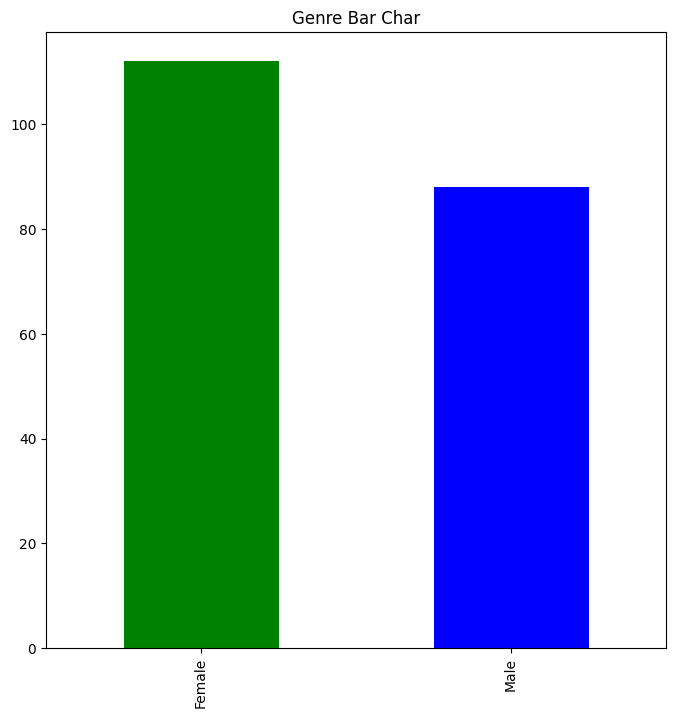

In [24]:
df.Genre.value_counts().plot(kind='bar',title='Genre Bar Char',figsize=(8,8),color=['green','blue'])
plt.show()

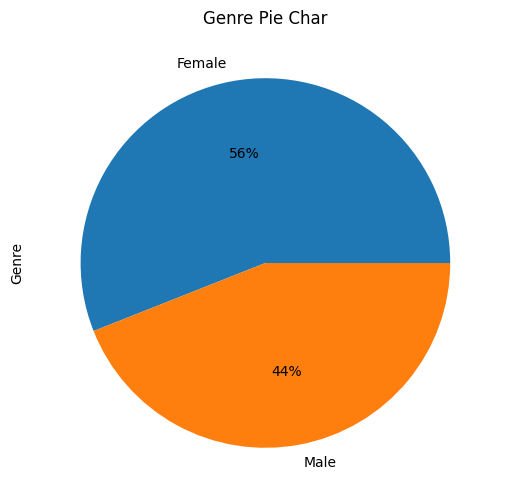

In [29]:
df.Genre.value_counts().plot(kind='pie',autopct='%1.0f%%',title='Genre Pie Char',figsize=(8,6))
plt.show()

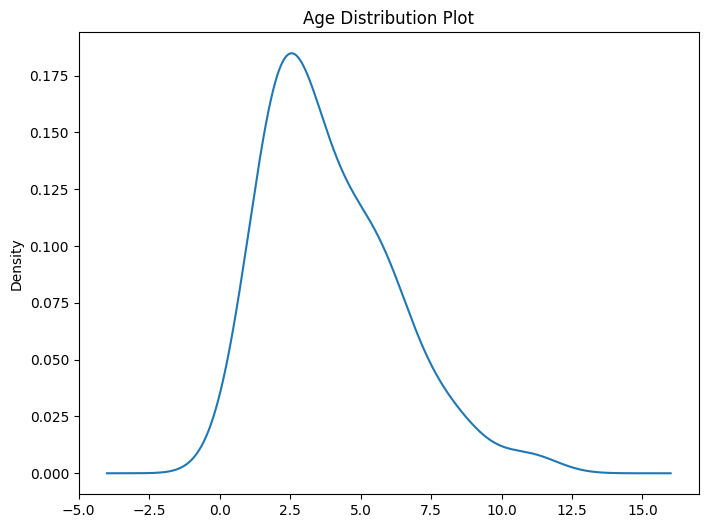

In [31]:
df.Age.value_counts().plot(kind='kde',title='Age Distribution Plot',figsize=(8,6))
plt.show()

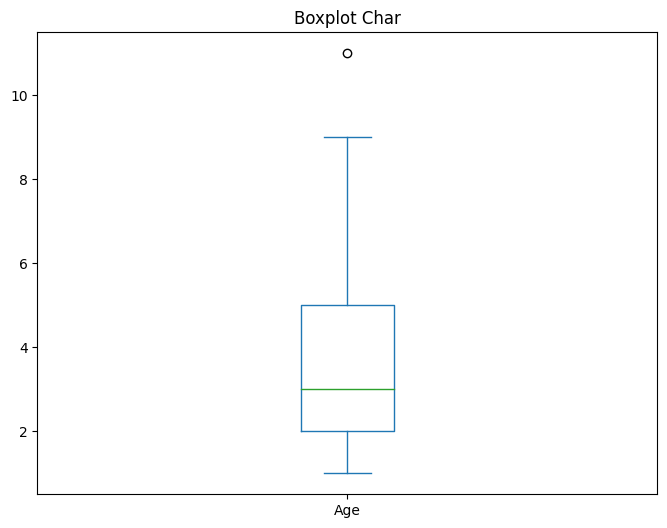

In [33]:
df.Age.value_counts().plot(kind='box',title='Boxplot Char',figsize=(8,6))
plt.show()

In [35]:
df['Annual Income (k$)'].max()

137

In [36]:
df['Annual Income (k$)'].min()

15

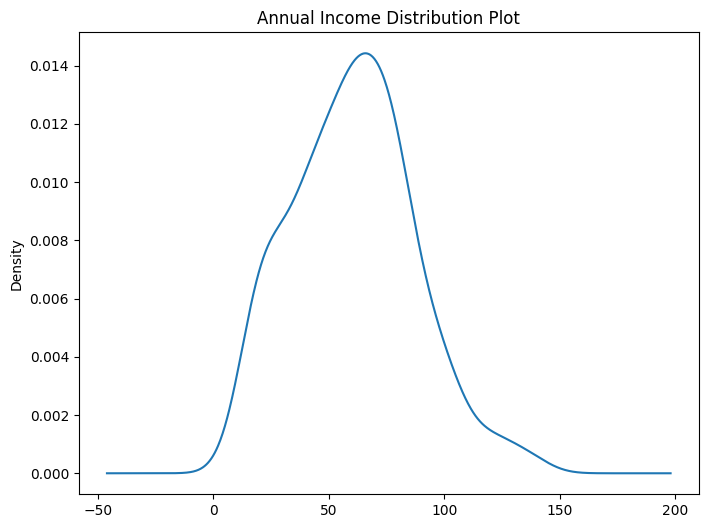

In [39]:
df['Annual Income (k$)'].plot(kind='kde',title='Annual Income Distribution Plot',figsize=(8,6))
plt.show()

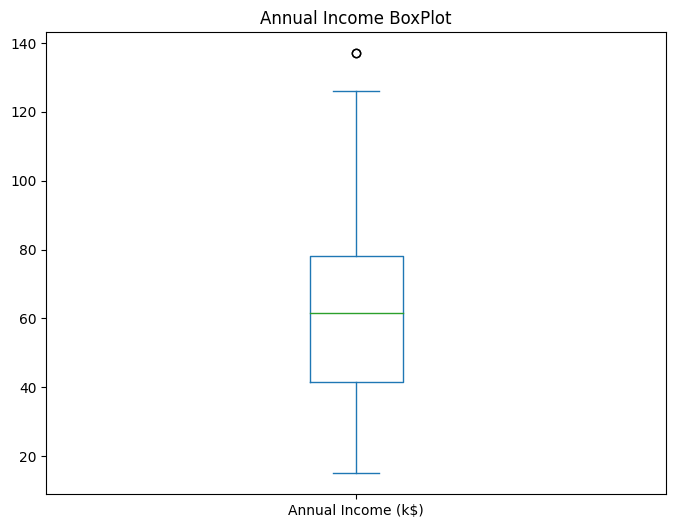

In [40]:
df['Annual Income (k$)'].plot(kind='box',title='Annual Income BoxPlot',figsize=(8,6))
plt.show()

In [43]:
df= df[df['Annual Income (k$)']<120]

In [44]:
df.shape

(194, 5)

In [45]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


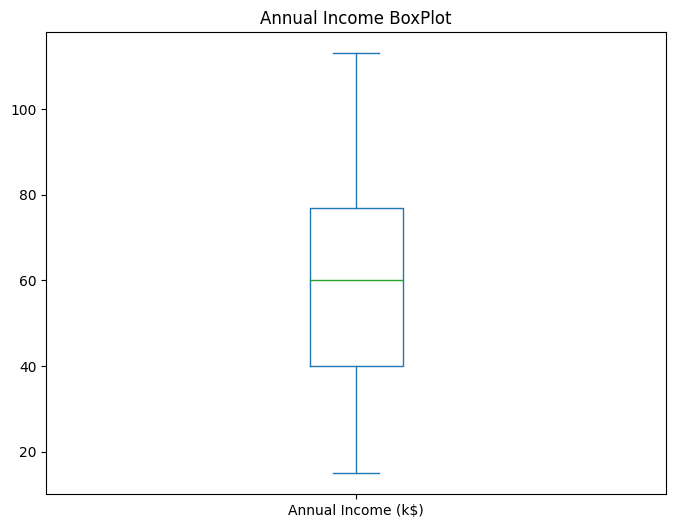

In [46]:
df['Annual Income (k$)'].plot(kind='box',title='Annual Income BoxPlot',figsize=(8,6))
plt.show()

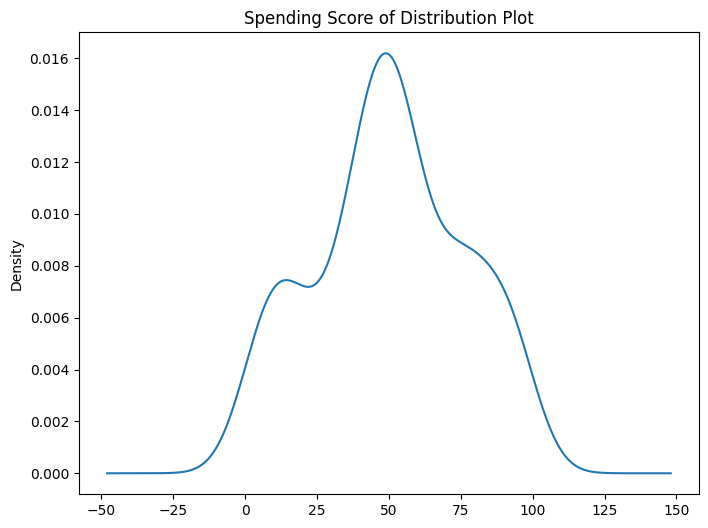

In [47]:
df['Spending Score (1-100)'].plot(kind='kde',title='Spending Score of Distribution Plot',figsize=(8,6))
plt.show()

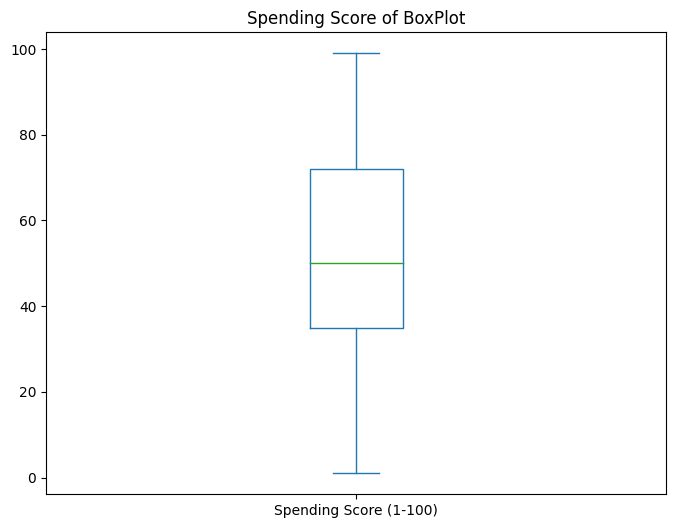

In [48]:
df['Spending Score (1-100)'].plot(kind='box',title='Spending Score of BoxPlot',figsize=(8,6))
plt.show()

In [49]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
df['Genre']= df['Genre'].apply(lambda x: 1 if 'Male' in x else 0 )

In [51]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [52]:
from sklearn.cluster import KMeans

In [53]:
X = df.iloc[:,:].values
X

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   0,  20,  16,   6],
       [  4,   0,  23,  16,  77],
       [  5,   0,  31,  17,  40],
       [  6,   0,  22,  17,  76],
       [  7,   0,  35,  18,   6],
       [  8,   0,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   0,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   0,  35,  19,  99],
       [ 13,   0,  58,  20,  15],
       [ 14,   0,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   0,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   0,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   0,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   0,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   0,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   0,  40,  29,  31],
       [ 30,  

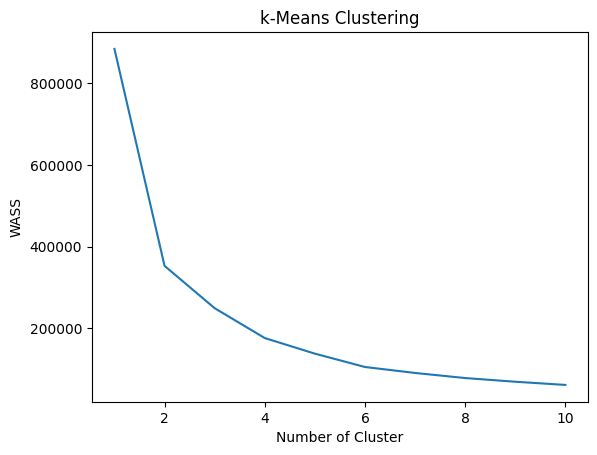

In [60]:
wass = []  #empty list
for index in range(1,11): #range of 1 to 10 implies that between this range any no. of clustrers can be formed 
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(X)
    
    wass.append(kmeans.inertia_)
plt.plot(range(1,11),wass)
plt.title("k-Means Clustering")
plt.xlabel("Number of Cluster")
plt.ylabel("WASS")
plt.show()

In [61]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [64]:
cluster_values = kmeans.fit_predict(X)

In [65]:
print(cluster_values)

[1 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 4 4 4 4 1 4 4 4 4 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0]


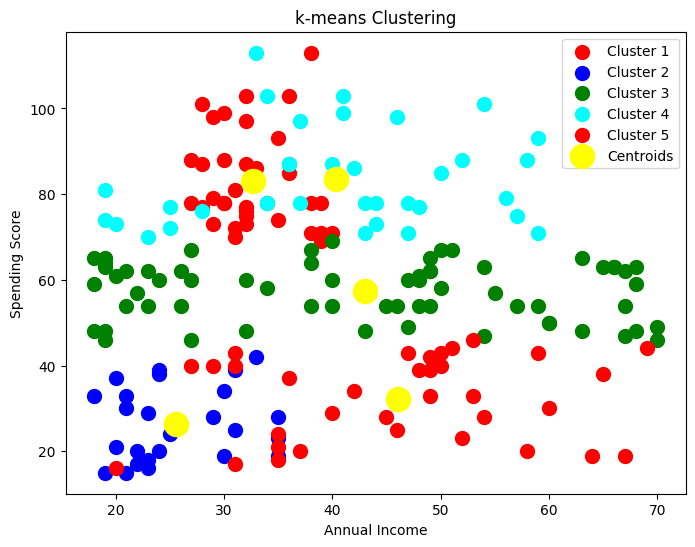

In [67]:
# Scatter Plot for k-means Cluster

plt.figure(figsize=(8,6))

plt.scatter(X[cluster_values==0, 2], X[cluster_values == 0, 3],s = 100, c='red',label = 'Cluster 1' )
plt.scatter(X[cluster_values==1, 2], X[cluster_values == 1, 3],s = 100, c='blue',label = 'Cluster 2' )
plt.scatter(X[cluster_values==2, 2], X[cluster_values == 2, 3],s = 100, c='green',label = 'Cluster 3' )
plt.scatter(X[cluster_values==3, 2], X[cluster_values == 3, 3],s = 100, c='cyan',label = 'Cluster 4' )
plt.scatter(X[cluster_values==4, 2], X[cluster_values == 4, 3],s = 100, c='red',label = 'Cluster 5' )


#Centroids for Clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], s=300,c='yellow',label= 'Centroids')

# Graph Labels

plt.title('k-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [68]:
cluster_values.shape

(194,)

In [69]:
df['Target']= cluster_values

In [70]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


In [71]:
df.Target.value_counts()

2    64
0    36
3    35
4    34
1    25
Name: Target, dtype: int64

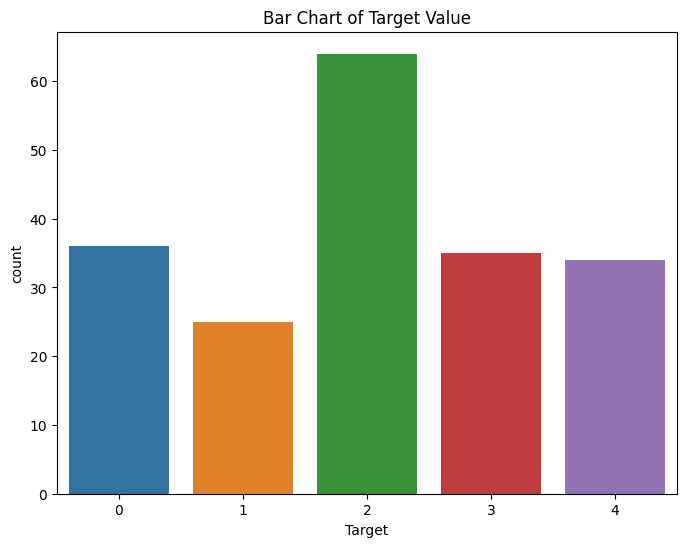

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.Target)
plt.title("Bar Chart of Target Value")
plt.show()

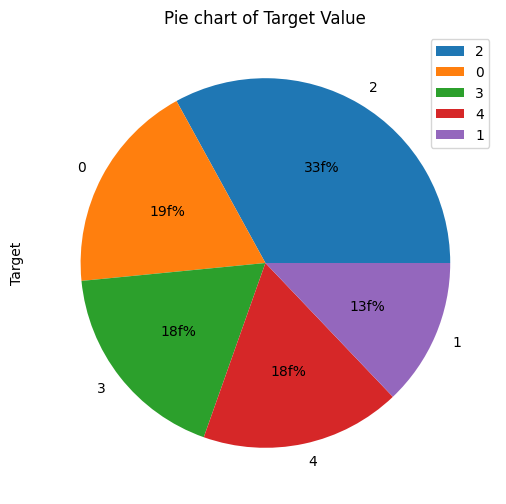

In [78]:
df.Target.value_counts().plot(kind='pie',autopct='%1.0ff%%',title='Pie chart of Target Value',figsize=(8,6),legend=True)
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [80]:
# Split the data into features and target variable

X = df.drop('Target',axis=1)
y = df['Target']

In [81]:
X

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
189,190,0,36,103,85
190,191,0,34,103,23
191,192,0,32,103,69
192,193,1,33,113,8


In [82]:
y

0      1
1      1
2      4
3      1
4      4
      ..
189    0
190    3
191    0
192    3
193    0
Name: Target, Length: 194, dtype: int32

In [83]:
# from sklearn.preprocessing import StandardScalar

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

In [87]:
# Train and test a decision tree classifire

dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cr_dtc = classification_report(y_test, y_pred_dtc)

In [88]:
# Train and test a k-neighbors neighbors Classifier

knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)

In [89]:
# Train and test a Gaussian native Bayes classifires

gnb = GaussianNB()
gnb.fit(X_train.values, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cr_gnb = classification_report(y_test, y_pred_gnb)

In [92]:
# Train and test a logistic regression classifire

lr = LogisticRegression()
lr.fit(X_train.values, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr)

In [93]:
# Train and test a random forcast classifire

rf = RandomForestClassifier()
rf.fit(X_train.values, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

In [94]:
# Train and test a support vectore machine classifier

svc = SVC()
svc.fit(X_train.values, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cr_svc = classification_report(y_test, y_pred_svc)

In [95]:
# Print the accuracies of each classifier

print("Decision Tree Accuracy:", accuracy_dtc)
print("KNN Accuracy:", accuracy_knn)
print("Gussian NB Accuracy:", accuracy_gnb)
print("Logistic Accuracy:", accuracy_lr)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svc)

Decision Tree Accuracy: 0.9487179487179487
KNN Accuracy: 0.9487179487179487
Gussian NB Accuracy: 0.9230769230769231
Logistic Accuracy: 0.9743589743589743
Random Forest Accuracy: 0.9487179487179487
SVM Accuracy: 0.9230769230769231


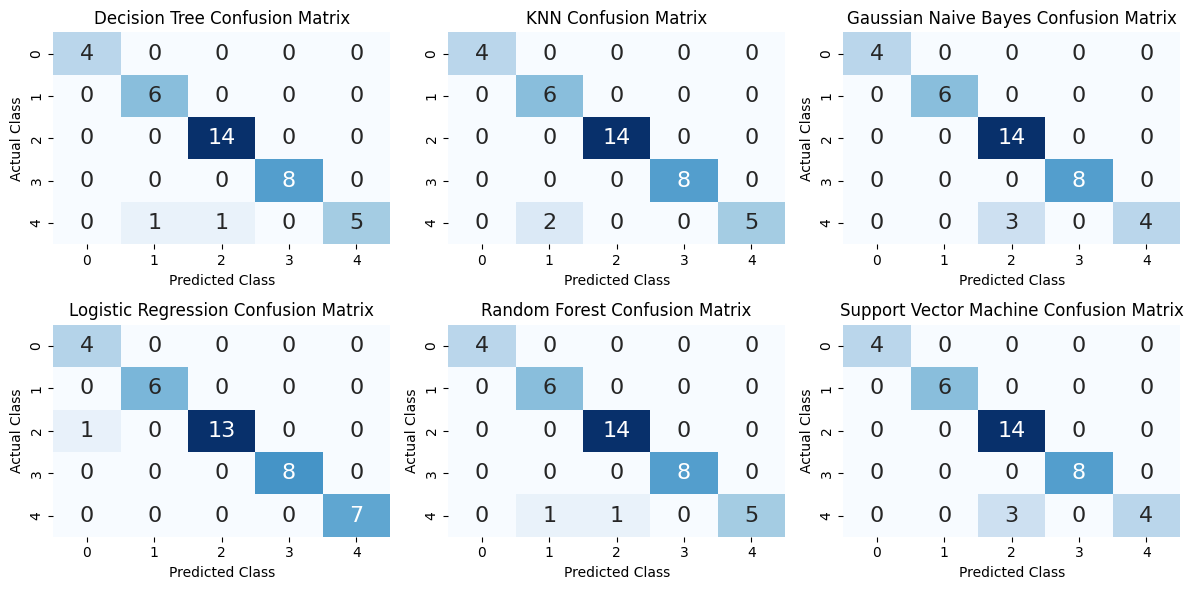

In [96]:
# Plot the confusion matrices for each classifier

plt.figure(figsize=(12, 6))
plt.subplot(231)
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(232)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Class")

plt.subplot(2, 3, 3)
sns.heatmap(cm_gnb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(2, 3, 4)
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(2, 3, 5)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(2, 3, 6)
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.tight_layout()
plt.show()

In [97]:
print("Decision Tree Classifier:\n", cr_dtc)
print("KNN Classifier:\n", cr_knn)
print("Gaussian Naive Bayes Classifier:\n", cr_gnb)
print("Logistic Regression Classifier:\n", cr_lr)
print("Random Forest Classifier:\n", cr_rf)
print("Support Vector Machine Classifier:\n", cr_svc)

Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.86      1.00      0.92         6
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       1.00      0.71      0.83         7

    accuracy                           0.95        39
   macro avg       0.96      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39

KNN Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      0.71      0.83         7

    accuracy                           0.95        39
   macro avg       0.95      0.94      0.94        39
weighted avg       0.96      0.95

In [99]:
import joblib
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

In [101]:
df.dtypes

CustomerID                int64
Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Target                    int32
dtype: object

In [102]:
df.to_csv("clean.csv")

In [103]:
df['Spending Score (1-100)'].max()

99